# Access G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages

In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 8.4 MB/s eta 0:00:00


In [4]:
from IPython import display
from ultralytics import YOLO
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Training

In [ ]:
# 1. enter into cwd

%cd /content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset
!pwd

/content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset
/content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset


In [ ]:
# ======= Training through command line ======
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset/data.yaml epochs=250 plots=True

In [7]:
# ======= Validation through command line ======
!yolo task=detect mode=val model=/content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset/runs/detect/train4/weights/best.pt data=/content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset/data.yaml

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11145708 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 16.5MB/s]
val: Scanning /content/drive/My Drive/ComputerVisionProject/PlayingCardsCustomDataset/valid/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100% 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [05:50<00:00, 14.01s/it]
                   all        400       1520      0.964      0.956      0.971      0.909
                   10c        400         42      0.999          1      0.995      0.896
                   10d        400         25      0.997          1      0.995      0.904
                   10h        400         33      0.995          1      0.995      0.898
                   10s        400         25      0.995          1      0.995      0.854
                    2c        400         31      0.995          1      0.995     

# Prediction

Enter Image Path: /content/testimage.jpg



image 1/1 /content/testimage.jpg: 224x640 3 10hs, 4 Ahs, 2 Jhs, 1 Kh, 2 Qhs, 254.2ms
Speed: 2.7ms preprocess, 254.2ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)


-----------------------------------------------------------------


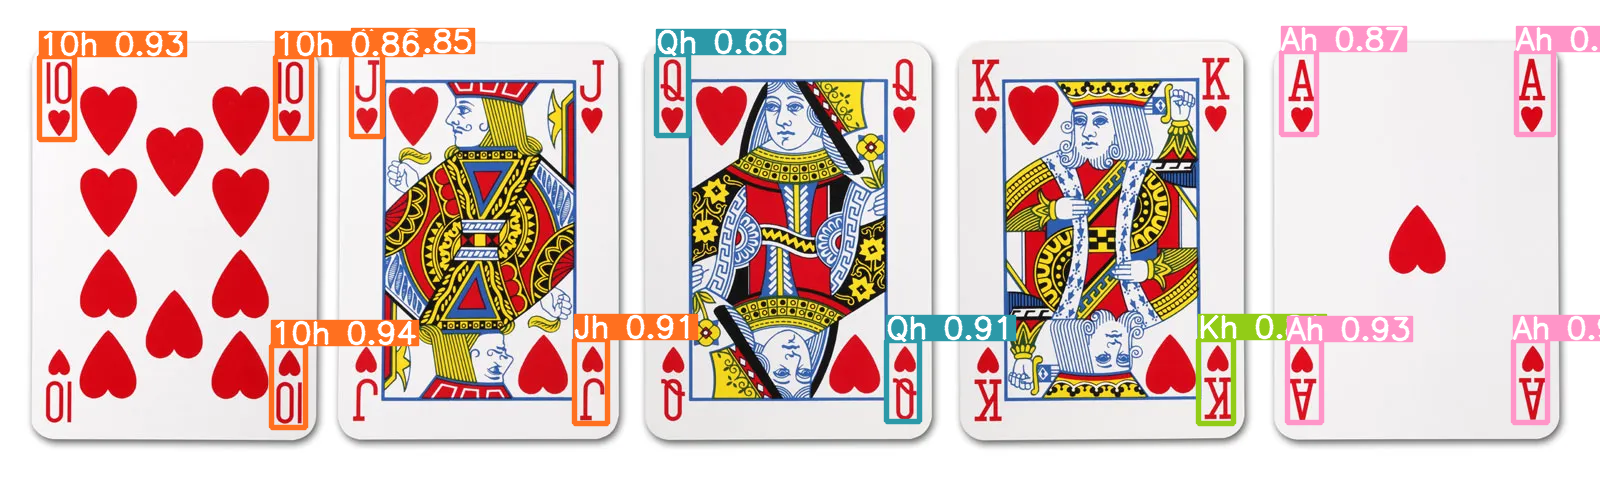

In [9]:
# ======= Prediction on unseen image ========

# get the best train model from train4 dir.
model = YOLO("/content/drive/MyDrive/ComputerVisionProject/PlayingCardsCustomDataset/runs/detect/train4/weights/best.pt")

# take image path as an i/p 
img_path = input("Enter Image Path: ")

# get the result
result = model.predict(source=img_path, conf=0.5)

# output result - bounding box
print("-----------------------------------------------------------------")
# print("BBOX: ",result[0].boxes)
res_plotted = result[0].plot()
cv2_imshow(res_plotted)